In [17]:
!apt install tree
!pip install -U deepsensemaking
!pip install hickle
!pip install humanfriendly
!pip install mne autoreject
!pip install tqdm
!pip install pingouin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Requirement already up-to-date: deepsensemaking in /usr/local/lib/python3.6/dist-packages (0.1.2020.12.21.4)


In [18]:
!rm -fR peaks
!git clone https://github.com/deepsensemaking/sgm_eeg__check_peaks_aggr.git peaks
!cd peaks && git pull
!cd peaks && git rev-parse --short HEAD

Cloning into 'peaks'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 103 (delta 60), reused 86 (delta 43), pack-reused 0
Receiving objects: 100% (103/103), 55.04 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Checking out files: 100% (39/39), done.
Already up to date.
742c2e3


In [19]:
!tree peaks


peaks
├── data
│   ├── arch
│   │   ├── dfA0.csv
│   │   ├── dfA2.csv
│   │   ├── dfC4_peaks_crude_XTRA_MEANS.csv
│   │   ├── dfZ1_peaks_crude_CONVERTED.csv
│   │   └── dfZ4_peaks_crude_XTRA_MEANS.csv
│   ├── bv_peaks
│   │   ├── 1_bv_peak.csv
│   │   ├── 2_bv_peak.csv
│   │   ├── 3_bv_peak.csv
│   │   ├── 4_bv_peak.csv
│   │   ├── 5_bv_peak.csv
│   │   └── 6_bv_peak.csv
│   ├── corr_bv_database_EEG_LONG.csv
│   ├── df0_peaks0_crude.csv
│   ├── df0_peaks0_crude.xtra.bund.means.csv
│   ├── df0_peaks0.csv
│   ├── df1_peaks1_crude.csv
│   ├── df1_peaks1_crude.xtra.bund.means.csv
│   ├── df1_peaks1.csv
│   ├── df2_peaks2_crude.csv
│   ├── df2_peaks2_crude.xtra.bund.means.csv
│   ├── df2_peaks2.csv
│   ├── df3_peaks3_crude.csv
│   ├── df3_peaks3_crude.xtra.bund.means.csv
│   ├── df3_peaks3.csv
│   ├── df4_peaks4_crude.csv
│   ├── df4_peaks4_crude.xtra.bund.means.csv
│   ├── df4_peaks4.csv
│   ├── dfA0.csv
│   ├── dfA2.csv
│   ├── dfZ0_peaks_crude_CONVERTED.csv
│   ├── dfZ0_peaks_crude_CONVE

In [21]:

"""
get_ipython().magic("run peaks__test_001.tg.ipy")

"""

get_ipython().magic("load_ext autoreload")
get_ipython().magic("autoreload 2"       )

import os
import sys
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# get_ipython().magic("matplotlib notebook")
get_ipython().magic("matplotlib inline")

import seaborn as sns

from collections import OrderedDict

import matplotlib as mpt
import mpmath as mmp
import scipy as sp
import pingouin as pg
import outdated as od
import statsmodels as sm
import sklearn as skl
import pandas.util.testing as tm
from scipy import stats as sp
from pingouin import  pairwise_ttests, read_dataset



import deepsensemaking as dsm
from   deepsensemaking.dicts import str_dict,print_dict
from   deepsensemaking.bids  import get_bids_prop
from   deepsensemaking.eeg   import convert_ZZ
from   deepsensemaking.eeg   import convert_ZZ_translators
from   deepsensemaking.eeg   import chan_bund_INEFFICIENT_mean
from   deepsensemaking.pd    import mgrs

from contextlib import ExitStack

from IPython.display import display,HTML,Image

_DIR = dsm.set_cwd()

pd.set_option("display.notebook_repr_html", dsm.base.outside_emacs() )

with ExitStack() as stack:
    [stack.enter_context(mgr) for mgr in mgrs]
    print( pd.get_option("display.max_rows") )


def dispDF(df_TEMP,n=6):
    with ExitStack() as stack:
        [stack.enter_context(mgr) for mgr in mgrs]
        display(df_TEMP.shape)
        display(df_TEMP.sample(n=n).sort_index())



INFO: no EMACS_BUFFER_DIR variable was found
INFO: keeping '/content' as CWD


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
200


In [22]:
ifSetup="peaks/data/setup.json"
with open(ifSetup) as fhSetup: setup = OrderedDict(json.load(fhSetup))
print_dict(setup,"setup",1,)


setup["params"]["flat"] # {'eeg': 1e-06} # <dict>
setup["params"]["scale"] # {'eeg': 2e-05} # <dict>
setup["params"]["reject"] # {'eeg': 0.00014} # <dict>
setup["params"]["subset"] = True
setup["events"]["dgn0"] = None # <NoneType>
setup["events"]["dict0"] # {'verb/X/8/S101/bakdawić': 101, 'verb/X # [...] # <dict>
setup["events"]["dictX"] # {'Stimulus/S101': 101, 'Stimulus/S102': # [...] # <dict>
setup["events"]["dictS"] # {'S101': 101, 'S102': 102, 'S103': 103, # [...] # <dict>
setup["queries"]["word_set"] # {'verb_X': '(POSGEN == "verb_X")', 'nou # [...] # <dict>
setup["colors0"]["word_set"] # {'all_in': '#999999', 'verb_X': '#e5786 # [...] # <dict>
setup["colors0"]["word_len"] # {'9': '#ff38c9', '8': '#a877e4', '7': ' # [...] # <dict>
setup["linestyles0"]["word_set"] # {'all_in': 'solid', 'verb_X': 'solid',  # [...] # <dict>
setup["linestyles0"]["word_len"] # {'9': 'solid', '8': 'solid', '7': 'soli # [...] # <dict>
setup["styles0"]["word_set"] # {'all_in': {'linewidth': 1}, 'verb_X

### Caution

/usr/local/lib/python3.6/dist-packages/pingouin/distribution.py:459: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.


In [7]:
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("default")

# Raw data

In [8]:
dfZZ = pd.read_csv("peaks/data/corr_bv_database_EEG_LONG.csv")
print( dfZZ.shape )

dfZZ = convert_ZZ(dfZZ,ifSetup="peaks/data/setup.json",verbose=0,)

# dispDF(dfZZ,11)


(110592, 9)


In [9]:
ifA2 = "peaks/data/dfA2.csv"
dfA2 = pd.read_csv(ifA2)
dispDF(dfA2,11)


(235008, 11)

,set0,mode0,cond0,chan0,later0,front0,bund0,tmin0,runn0,subj0,valX
3515,C3bund,neg,noun_M,LP,L,P,NaN,0.11,0,04mkkm,-0.440114
23176,C3bund,pos,noun_F,RP,R,P,NaN,0.35,0,16olxm,4.063305
37924,C3chan,pos,noun_X,CP3,L,C,LC,0.35,0,25abxf,4.090530
71966,C4bund,pos,noun_X,LC,L,C,NaN,0.19,0,36rwxm,4.859484
88702,Z3chan,pos,verb_X,P6,R,P,RP,0.19,3,42aszm,5.229360
91558,Z3chan,pos,noun_M,PO7,L,P,LP,0.19,3,13jsxm,9.410773
141828,Z3chan,pos,verb_X,O2,R,P,RP,0.60,1,04mkkm,2.599281
180819,Z3chan,pos,verb_X,P6,R,P,RP,0.10,4,28pmsf,12.811827
181818,Z3chan,pos,verb_X,P8,R,P,RP,0.10,3,20jpxf,8.013247
185749,Z4bund,pos,verb_X,RF,R,F,NaN,0.35,3,38slxm,-1.570253


# How to query

In [10]:
temp_query = " & ".join([
    """ set0   == "C3chan" """,
    """ tmin0  == 0.35     """,
    """ mode0  == "pos"    """,
    """ front0 == "F"      """,
    """ cond0 in ["noun_M","noun_F","verb_X"] """,
])

dfA2.query(temp_query)



,set0,mode0,cond0,chan0,later0,front0,bund0,tmin0,runn0,subj0,valX
4,C3chan,pos,verb_X,AF3,L,F,LF,0.35,0,03mjkf,0.538271
16,C3chan,pos,verb_X,AF4,R,F,RF,0.35,0,03mjkf,1.201428
172,C3chan,pos,verb_X,F1,L,F,LF,0.35,0,03mjkf,0.238368
184,C3chan,pos,verb_X,F2,R,F,RF,0.35,0,03mjkf,0.145886
196,C3chan,pos,verb_X,F3,L,F,LF,0.35,0,03mjkf,-0.147506
...,...,...,...,...,...,...,...,...,...,...,...
63736,C3chan,pos,noun_M,F6,R,F,RF,0.35,0,42aszm,0.394950
63748,C3chan,pos,noun_M,FC1,L,F,LF,0.35,0,42aszm,2.797029
63760,C3chan,pos,noun_M,FC2,R,F,RF,0.35,0,42aszm,2.487624
63772,C3chan,pos,noun_M,FC3,L,F,LF,0.35,0,42aszm,1.942999


In [11]:
display(list(dfA2.columns))


['set0',
 'mode0',
 'cond0',
 'chan0',
 'later0',
 'front0',
 'bund0',
 'tmin0',
 'runn0',
 'subj0',
 'valX']

In [12]:
display(list(dfA2.set0.unique()))


['C3chan', 'C3bund', 'C4bund', 'Z3chan', 'Z4bund', 'Z0chan', 'Z0bund']

# AOVs

In [13]:
# This dictionary will contain all the analysis 
DS = OrderedDict()

# First analysis (`IDX=1`)

In [14]:
# IDX is the key that identifies this analysis item
IDX = 1
DS[IDX] = OrderedDict()
# here we select the sub-database (set0) and relevant data slices (tmin0,cond0)
DS[IDX]["query"] = " & ".join([
    """ set0   == "Z0chan" """,
    """ tmin0  == 0.35     """,
    """ mode0  == "pos"    """,
    """ front0 == "F"      """,
    """ cond0 in ["noun_M","noun_F","verb_X"] """,
])
DS[IDX]["args"] = OrderedDict()
DS[IDX]["args"]["data"]       = dfA2.query(DS[IDX]["query"]).copy()
DS[IDX]["args"]["dv"]         = "valX"
DS[IDX]["args"]["within"]     = ["cond0","later0",]
DS[IDX]["args"]["subject"]    = "subj0"
DS[IDX]["args"]["correction"] = "auto"
DS[IDX]["args"]["detailed"]   = False
DS[IDX]["args"]["effsize"]    = "np2" # "np2" "n2" "ng2"
DS[IDX]["AOV"]  = pg.rm_anova(**DS[IDX]["args"])

display(DS[IDX]["AOV"].round(3))
display(DS[IDX]["args"]["data"].groupby(DS[IDX]["args"]["within"]).agg(["count","mean","std"])["valX"])
display(DS[IDX]["args"]["data"].shape)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,cond0,12.260,2,62,6.130,7.250,0.001,0.002,0.190,0.949
1,later0,1.526,1,31,1.526,1.098,0.303,0.303,0.034,1.000
2,cond0 * later0,0.085,2,62,0.042,0.425,0.655,0.634,0.014,0.899


count      mean       std
cond0  later0                           
noun_F L         192 -2.724195  2.194704
       R         192 -2.936784  2.164322
noun_M L         192 -2.705620  2.244477
       R         192 -2.908872  1.991843
verb_X L         192 -2.223688  1.993187
       R         192 -2.342725  2.012630

(1152, 11)

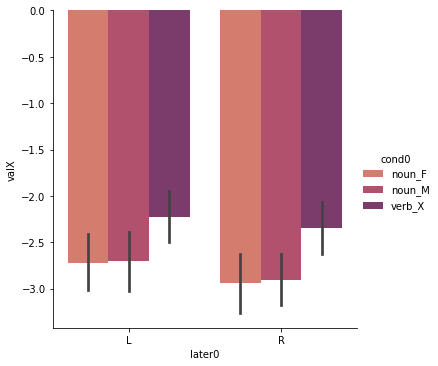

In [95]:
sns.catplot(
    x       = DS[IDX]["args"]["within"][1],
    y       = DS[IDX]["args"]["dv"],
    hue     = DS[IDX]["args"]["within"][0],
    data    = DS[IDX]["args"]["data"],
    kind    = "bar", 
    palette = "flare",
    height  = 5, 
    aspect  = 1,
)
plt.show()

In [65]:
?sns.catplot